In [ ]:
#Following is a Project in Data Analysis using Pandas. 
#My main question for this project is, "How does the age of a house affect the price?" 
#I am using the Dataset house.csv to extract data to support my findings. 

In [82]:

#Import my pandas library modules and submodule pyplot 

import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt


In [83]:
#import my housing dataset from Kaggle after moving and unzipping the dataset in my project folder
housing_unit = pd.read_csv('house.csv')

In [84]:
# Display the first 10 rows of the dataset to see the column names and data in the columns
housing_unit.head(10)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.18,1286.68,204.00,22,67,96004.80
1,1,34.87,1855.25,186.98,8,30,92473.72
2,1,36.98,692.09,111.22,24,24,98112.52
3,1,17.45,1399.49,238.00,1,66,92118.33
4,1,52.59,84.65,101.00,20,3,98976.65
5,1,22.43,1901.10,218.60,6,23,91491.71
6,1,33.03,1833.94,159.89,21,0,93381.41
7,1,27.88,1384.89,145.17,14,12,93503.28
8,1,69.77,640.89,130.39,12,18,98708.32
9,1,37.80,1754.86,195.99,23,80,90417.78


In [85]:
# Displaying the size of the data set and data types of the data in each column
housing_unit_shape = housing_unit.shape
print(f'The DataFrame has {housing_unit_shape[0]} rows and {housing_unit_shape[1]} columns! \n')
print(housing_unit.info())

The DataFrame has 4308 rows and 7 columns! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB
None


In [86]:
# test for missing values (there are no missing values at this point)
print(housing_unit.isnull().any().any())


False


In [87]:
#get column names to prepare to drop unnecessary files 
housing_unit.columns

Index(['bedroom_count', 'net_sqm', 'center_distance', 'metro_distance',
       'floor', 'age', 'price'],
      dtype='object')

In [88]:
#Get an idea of what the age data looks like
housing_unit['age'].value_counts


<bound method IndexOpsMixin.value_counts of 0       67
1       30
2       24
3       66
4        3
        ..
4303     5
4304     5
4305     5
4306     2
4307     0
Name: age, Length: 4308, dtype: int64>

In [89]:
#Get an idea of what the price data looks like
housing_unit['price'].value_counts

<bound method IndexOpsMixin.value_counts of 0       96004.80
1       92473.72
2       98112.52
3       92118.33
4       98976.65
          ...   
4303   102707.36
4304    99695.06
4305    93803.72
4306    92914.73
4307    93743.05
Name: price, Length: 4308, dtype: float64>

In [90]:
#Set the display options for Pandas.  The first line sets a global display option in Pandas to format 
#floating point numnbers, and formats the numbers to show two decimal places. 
#The second line gives a summary of descriptive statistics for the dataset housing_unit.  
pd.set_option('display.float_format', '{:.2f}'.format)
housing_unit.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00
mean,3.73,118.94,1090.54,105.67,9.40,48.58,95701.20
std,2.48,95.47,555.33,60.75,7.52,27.62,3919.82
min,1.00,10.24,11.80,1.25,1.00,0.00,86113.59
25%,2.00,52.24,635.90,56.16,2.00,25.00,92934.25
50%,3.00,91.83,1143.13,101.39,8.00,48.00,95337.79
75%,5.00,150.99,1554.28,148.48,16.00,72.00,97980.68
max,17.00,750.97,1999.84,330.28,24.00,97.00,118134.77


In [91]:
#Define my program to clean my dataset.
def clean_hu(housing_unit):

    # Convert the first letter of each column name to a capital with title and strip extra spaces and 
    # replace _ with a space.
    housing_unit.columns = housing_unit.columns.str.title()
    housing_unit.columns = housing_unit.columns.str.strip().str.replace('_', ' ')


    # Drop unnecessary columns that will not be needed in my analysis.
    cols_to_drop = ['Bedroom Count', 'Net Sqm', 'Center Distance', 'Metro Distance', 'Floor']
    housing_unit = housing_unit.drop(columns=cols_to_drop, errors='ignore')


    # Drop rows with missing values.
    housing_unit = housing_unit.dropna()
    return housing_unit

In [92]:
# call my function to clean my data, drop unnecessary columns, and print out the result to make sure the 
# correct columns were cleaned and dropped.
housing_unit_cleaned = clean_hu(housing_unit)
housing_unit_cleaned.head(10)


,Age,Price
0,67,96004.80
1,30,92473.72
2,24,98112.52
3,66,92118.33
4,3,98976.65
5,23,91491.71
6,0,93381.41
7,12,93503.28
8,18,98708.32
9,80,90417.78


In [93]:
#Set the display options for Pandas for the new cleaned dataset - housing_unit_cleaned.  The first 
#line sets a global display option in Pandas to format floating point numnbers, and formats the numbers 
# to show two decimal places. 
#The second line gives a summary of descriptive statistics for the dataset housing_unit_cleaned.  
pd.set_option('display.float_format', '{:.2f}'.format)
housing_unit_cleaned.describe()

,Age,Price
count,4308.00,4308.00
mean,48.58,95701.20
std,27.62,3919.82
min,0.00,86113.59
25%,25.00,92934.25
50%,48.00,95337.79
75%,72.00,97980.68
max,97.00,118134.77


In [94]:
# Add a column name "Price above 95000" with Yes if true.  
# Add a column name "Age of Unit" less than 5 years with Yes if true.  
#Just gives an extra set of data that could be used to find trends in price related to an age of house by 
#comparing 'Age Less Than 5 Years' and 'Price Above 95000', ie how many of each combination (''yes, yes'', 
# ''yes','no'', ''no', 'yes'', ''no','no'') 
housing_unit_cleaned['   Age Less Than 5 Years'] = np.where(housing_unit_cleaned['Age'] <= 5, 'Yes', 'No')
housing_unit_cleaned['   Price Above 95000'] = np.where(housing_unit_cleaned['Price'] >= 95000, 'Yes', 'No')
housing_unit_cleaned


,Age,Price,Age Less Than 5 Years,Price Above 95000
0,67,96004.80,No,Yes
1,30,92473.72,No,No
2,24,98112.52,No,Yes
3,66,92118.33,No,No
4,3,98976.65,Yes,Yes
...,...,...,...,...
4303,5,102707.36,Yes,Yes
4304,5,99695.06,Yes,Yes
4305,5,93803.72,Yes,No
4306,2,92914.73,Yes,No


In [95]:
import matplotlib.pyplot as plt
#Plots a sample of the 'Age of the Housing Units' and the 'Price of the Housing Units' data in the dataset
#in a pie chart.  It is the first 20 rows from the dataset. If it is decided to continue with the project 
#I will print out the whole dataset in sections.  For now we have a sample to get an idea of what the data 
#looks like.
def plot_age_and_price_distribution(housing_unit_cleaned: pd.DataFrame) -> None:
    """
    Plots the distribution of Age of units and Unit Price data.

    This function creates a set of two pie charts:
    1. The first chart shows a sample of Ages of the units in years in the dataset.
    2. The second chart shows a sample of Price of some of the units in US dollars, 
    labeling them as 'Age' and 'Price'.

    Args:
        housing_unit_cleaned (pd.DataFrame): A DataFrame containing the 'Age' and 'Price' columns.

    Returns:
        None: The function generates and displays two pie charts.
    """
    # Count the values in 'Age' and 'Price'
    age_counts = housing_unit_cleaned['Age'].value_counts().head(20)
    price_counts = housing_unit_cleaned['Price'].value_counts().head(20)

    # Define the subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for 'Age' 
    axes[0].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=210,
                labeldistance=1.2)  
    axes[0].set_title('Age Distribution')

    # Calculate actual price values for the 'Price' distribution
    total_price = price_counts.sum()  # Total of the price values
    price_labels = [f'${x:,.2f}' for x in price_counts.index]  # Format labels with 2 decimals


    # Plot for 'Price' and set the Title to 'Price Distribution'
    axes[1].pie(price_counts, labels=price_labels,
                #labels=price_counts.index,
                startangle=90, labeldistance=1.1)
    axes[1].set_title('Price Distribution')

    #Display the charts.
    plt.tight_layout()
    plt.show()


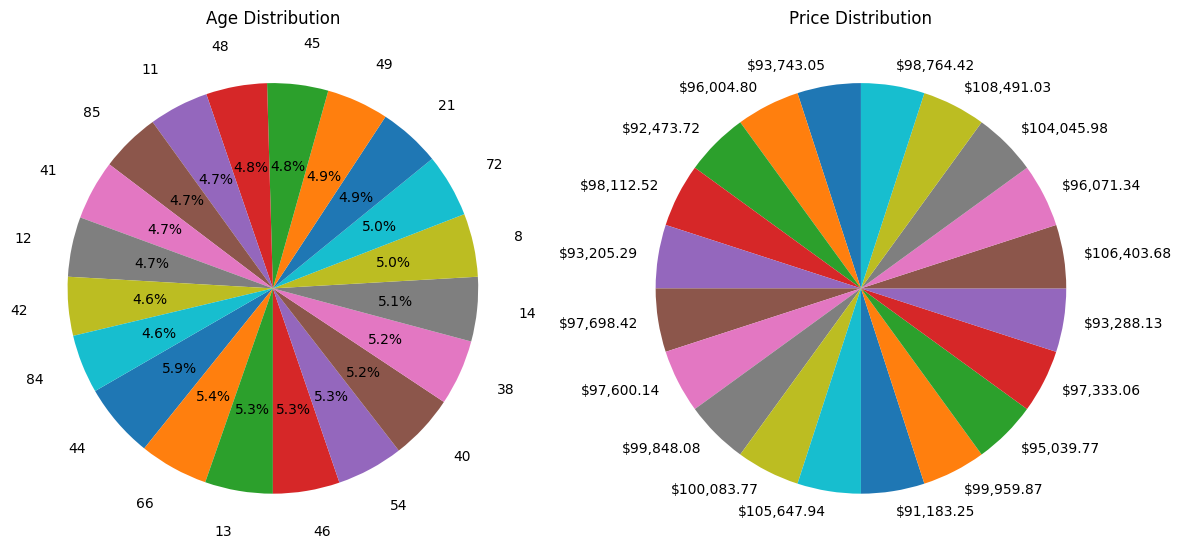

In [96]:
plot_age_and_price_distribution(housing_unit_cleaned)

In [97]:
import matplotlib.pyplot as plt
# Plots the distribution of Age of the Units and the Price of the Units. 
def plot_age_and_price_distribution(housing_unit_cleaned: pd.DataFrame) -> None:
    """
    Plots the distribution of Age of units and Unit Price data.

    This function creates a set of two pie charts:
    1. The first chart shows the distribution of Age of all the units in years in the dataset.
    2. The second chart shows the distribution of Price of each unit in US dollars, 
    labeling them as 'Age' and 'Price'.

    Args:
        housing_unit_cleaned (pd.DataFrame): A DataFrame containing the 'Age' and 'Price' columns.

    Returns:
        None: The function generates and displays two pie charts.
    """
    # Count the values in 'Age' and 'Price'
    age_counts = housing_unit_cleaned['Age'].value_counts().tail(20)
    price_counts = housing_unit_cleaned['Price'].value_counts().tail(20)

    # Define the subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for 'Age' 
    axes[0].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=210,
                labeldistance=1.2)  
    axes[0].set_title('Age Distribution')

    # Calculate actual price values for the 'Price' distribution
    total_price = price_counts.sum()  # Total of the price values
    price_labels = [f'${x:,.2f}' for x in price_counts.index]  # Format labels with 2 decimals


    # Plot for 'Price'
    axes[1].pie(price_counts, labels=price_labels,
                #labels=price_counts.index,
                startangle=90, labeldistance=1.1)
    axes[1].set_title('Price Distribution')

    plt.tight_layout()
    plt.show()


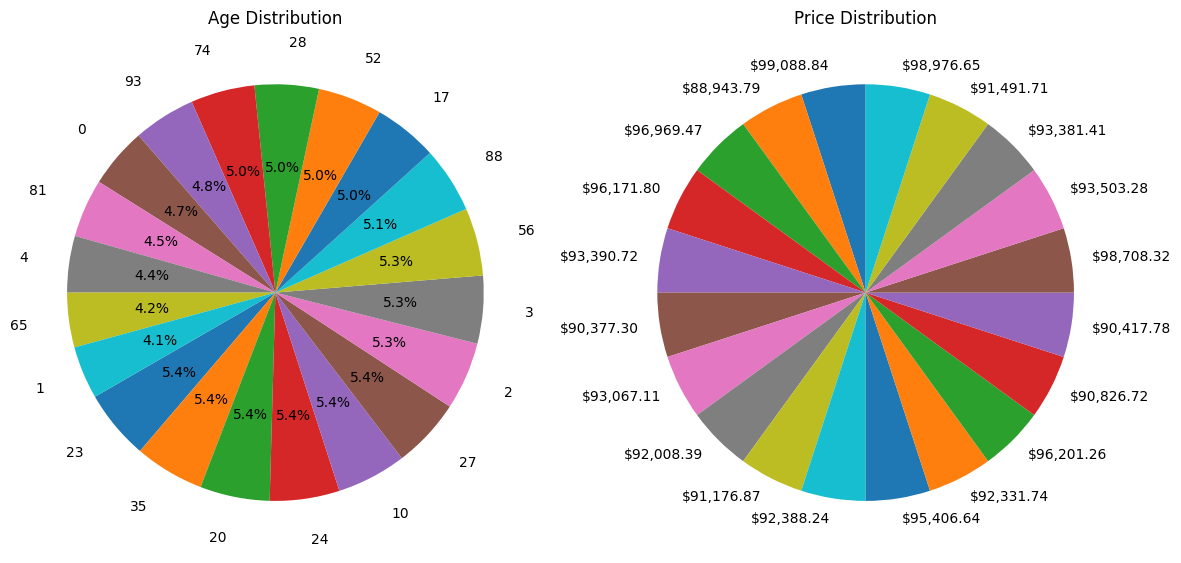

In [98]:
plot_age_and_price_distribution(housing_unit_cleaned)

In [99]:
#Calculate the mean and median to verify they each need their own line
import matplotlib.pyplot as plt
import numpy as np

# Calculate the median and mean for the Price column
median_y = np.median(housing_unit_cleaned['Price'])
mean_y = np.mean(housing_unit_cleaned['Price'])

# Print the values to check if they are different
print(f"Median: {median_y}")
print(f"Mean: {mean_y}")

Median: 95337.792915
Mean: 95701.19618502785


Median: 95337.792915
Mean: 95701.19618502785


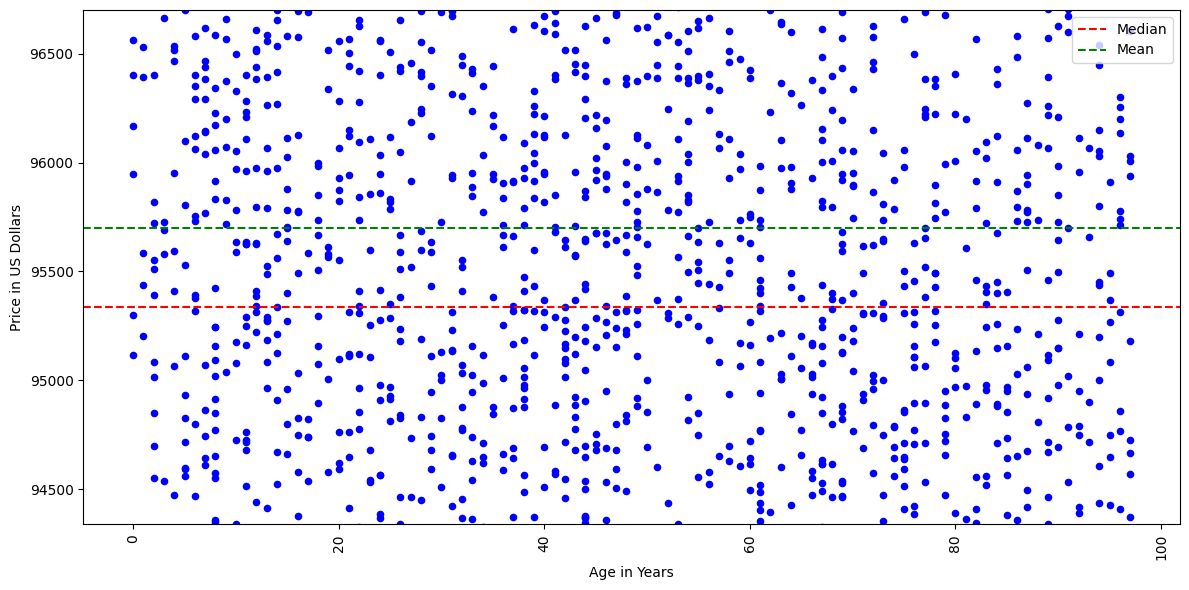

In [100]:
#Import the needed libraries again.
#Here I create a scatter plot to show the relationship between the mean and the median.  The graph is  
#zoomed in on the price of 94,000 to 97,000 because the mean and median lines run together when not zoomed 
#in because they are so close. 
import matplotlib.pyplot as plt
import numpy as np

# Calculate the median and mean for the Price column
median_y = np.median(housing_unit_cleaned['Price'])
mean_y = np.mean(housing_unit_cleaned['Price'])

# Print the values to check if they are different
print(f"Median: {median_y}")
print(f"Mean: {mean_y}")

# Plots a Scatter Plot usually to look for trends or obvious correlations 
housing_unit_cleaned.plot(
    kind='scatter', 
    x='Age', 
    y='Price', 
    rot=90, 
    color='Blue', 
    figsize=(12, 6)
).set(
    xlabel='Age in Years', 
    ylabel='Price in US Dollars'
)

# Plot the median line
plt.axhline(y=median_y, color='r', linestyle='--', label='Median')

# Plot the mean line
plt.axhline(y=mean_y, color='g', linestyle='--', label='Mean')

# Adjust the y-axis limits to zoom in further
# Using a smaller range around the median and mean to make the lines visible
y_min = min(median_y, mean_y) - 1000
y_max = max(median_y, mean_y) + 1000
plt.ylim(y_min, y_max)

# Add a legend to explain the lines
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()          # Display the plot

In [101]:
#In the chart above ↑ the median line is red and the mean line is green.  
#As we can see in the scatter plot above the mean and the median are very close, which is what this 
#scatter plot demonstrates. 

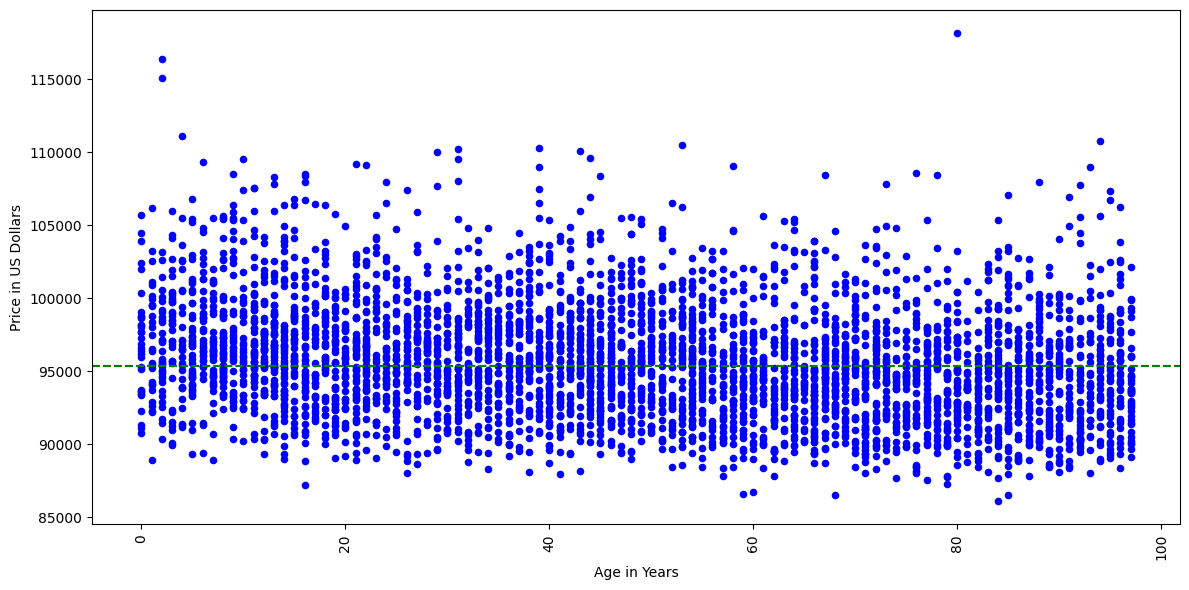

In [ ]:
#Create a new scatter plot to show the trend in housing unit prices in relationship to the age of the 
#housing unit. 

# Plots a Scatter Plot to look for trends or obvious correlations
housing_unit_cleaned.plot(
    kind='scatter', 
    x='Age', 
    y='Price', 
    rot= 90, 
    color='Blue', 
    figsize=(12,6)
).set(
    xlabel='Age in Years', 
    ylabel='Price in US Dollars'
)

#calculate the median line based on the 'Price' column
median_y = np.median(housing_unit_cleaned['Price'])
plt.axhline(y=median_y, color='r', linestyle='--')

#calculate the mean line based on the 'Price' column
mean_y = np.mean(housing_unit_cleaned['Price'])
plt.axhline(y=median_y, color='g', linestyle='--')

#Show the plot
plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()          # Display the plot

In [ ]:
#In the chart above  the median/mean line help us to see that there is a downward trend in prices
#of the housing units as the housing units age. The higher the age, the lower the price is the trend. 

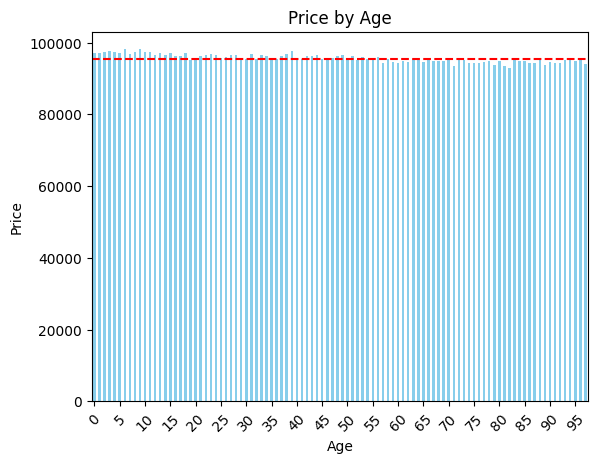

In [103]:

#This script creates a bar chart to visualize the relationship between the age of housing units 
#and their average prices. The chart also includes a median price line for added context.
housing_unit_cleaned = pd.DataFrame(housing_unit_cleaned)

# Group by 'Age' and calculate the average 'Price' for each age group
age_price = housing_unit_cleaned.groupby('Age')['Price'].mean()

# Plot the bar chart
age_price.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price by Age')

#calculate the median line based on the 'Price' column
median_y = np.median(housing_unit_cleaned['Price'])
plt.axhline(y=median_y, color='r', linestyle='--')

# Customize the x-axis to show ages in steps of 5 years
plt.xticks(range(0, len(age_price), 5), age_price.index[::5], rotation=45)


# Display the plot
plt.show()


In [ ]:
CLOSING SUMMARY:

#This project aimed to explore and analyze the relationship between the age of housing units and their 
#corresponding prices. Using a cleaned dataset (housing_unit_cleaned), the data was grouped by the age 
#of housing units, and the average prices were calculated for each group. The findings were visualized 
#using a bar chart, complemented by a median price line for context.

#The analysis provided insights into price trends across various age groups and allowed for comparisons 
#between the average and median prices. Additional customizations, such as labeling and axis adjustments, 
#ensured the clarity and interpretability of the results.


KEY FINDINGS:

#Price Trends by Age:
# * The bar chart revealed clear patterns in how the average price of housing units varied with age.
# * Include specific observations, e.g., "Newer housing units (<10 years old) exhibited higher average 
#   prices compared to older units (50+ years old)."]
#Median Price Insight:
# * The median price was calculated and highlighted as a red dashed line on the chart.
# * [Mention any comparison between average prices and the median, e.g., "For certain age groups, the 
#   average price significantly exceeded the median, suggesting a few high-priced units might skew the 
#   data."]
#Age Group Comparisons:
# * The x-axis customization enabled a more granular view of price distribution by age group in intervals 
#   of 5 years.
# * [Include a noteworthy observation, e.g., "Price differences between consecutive age groups were minimal,
#   except for a significant drop after 30 years."]
#Outliers or Anomalies:
# * [Highlight any anomalies observed, e.g., "A spike in prices for housing units aged 20–25 years indicates
#   a potential factor influencing their valuation."]


#Conclusions and Implications
# * Market Dynamics: The analysis suggests that housing unit age has a notable impact on pricing. Buyers and 
#   investors should consider age as a critical factor when evaluating properties.
# * Median vs. Average: The inclusion of the median price provided a balanced perspective on housing values,
#   revealing disparities that averages alone might mask.
# * Future Exploration:
#   * Investigate other factors such as location, size, or condition that may influence the observed pricing
#     trends.
#   * Perform regression analysis to quantify the relationship between age and price while controlling for 
#     additional variables.


#Recommendations
# * For Stakeholders: Consider leveraging these insights to develop targeted pricing strategies, whether for
#   new housing developments or renovations of older properties.
# * For Further Analysis: Enrich the dataset by incorporating categorical variables (e.g., region or 
#   neighborhood) and evaluate how these interact with housing age and price.


#NOTE:
#At some point in the future I plan to look at all members of the dataset, instead of just a sampling, to 
#to get a more accurate and complete picture of the effect of the Age of a Unit on the Price of a Unit.  
#Also, I will add other factors, quiries and analyses. 










